# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Cindy Maharani
- **Email:** cindymaharani29@gmail.com
- **ID Dicoding:** A009XBM106

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa peminjaman sepeda dua tahun terakhir?
2. Apakah hari tertentu memiliki pola peminjaman yang lebih tinggi?
3. Apakah ada musim tertentu di mana peminjaman sepeda meningkat secara signifikan?
4. Bagaimana pengaruh kondisi lingkungan (suhu, kelembapan, kecepatan angin) terhadap jumlah peminjaman sepeda?
5. Bagaimana pola penggunaan antara pengguna kasual dan pengguna terdaftar?


## Import Semua Packages/Library yang Digunakan

In [94]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat table day (peminjaman sepeda per hari)

In [95]:
# Memuat tabel day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [96]:
# Melihat ukuran (banyak baris dan kolom) tabel day
day_df.shape

(731, 16)

#### Memuat tabel hour (peminjaman sepeda per jam)

In [97]:
# Memuat tabel hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [98]:
# Melihat ukuran (banyak baris dan kolom) tabel hour
hour_df.shape

(17379, 17)

#### **Insight:**
- Dataset ini merupakan hasil pencatatan peminjaman sepeda  per hari dan per jam dengan total **731 baris (hari)** dan **17379 baris (jam)**
- Kolom - kolom utamanya antara lain:
  - instant: Indeks unik.
  - dteday: Tanggal dalam format YYYY-MM-DD.
  - season, yr, mnth, holiday, weekday, workingday, weathersit: Berbagai variabel kategori terkait waktu dan cuaca.
  - temp, atemp, hum, windspeed: Variabel numerik terkait kondisi lingkungan.
  - casual, registered, cnt: Jumlah penyewa sepeda (kasual, terdaftar, total).
- Dataset ini sudah dinormalisasi, seperti kolom kategorikal sudah diubah ke numerik dan kolom numerik kotinu (temp, atemp,	hum, windspeed) juga sudah dinormalisasi menjadi rentang 0 ~ 1.

### Assessing Data

#### Menilai data tabel day

In [99]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [100]:
# Melihat parameter statistik tabel day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [101]:
# Cek duplikasi data pada tabel day
print('Jumlah duplikasi tabel day: ', day_df.duplicated().sum())

Jumlah duplikasi tabel day:  0


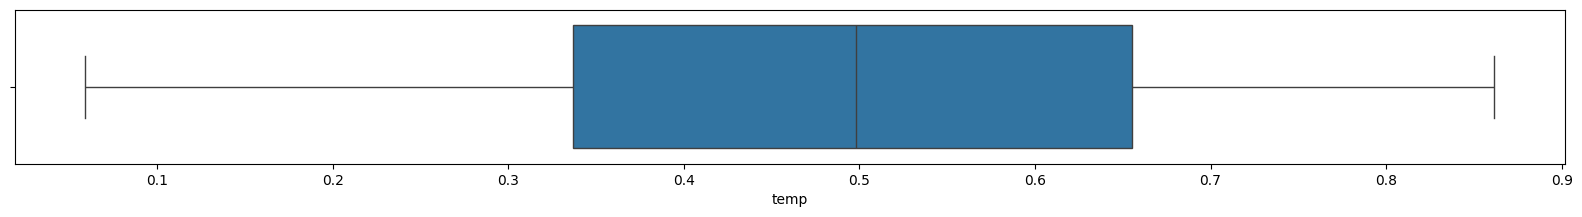

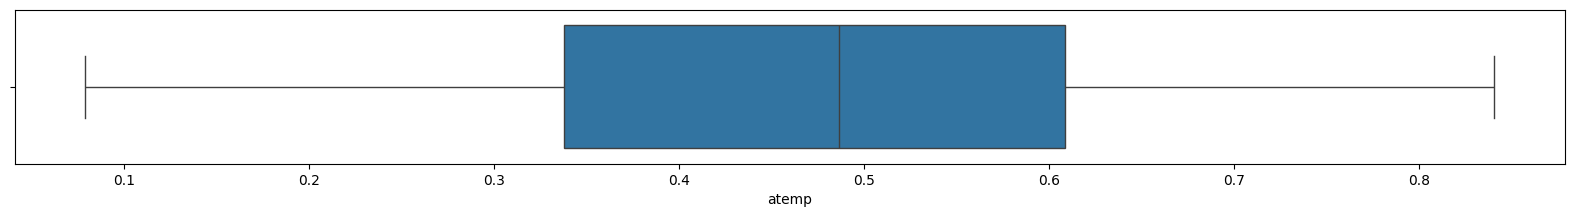

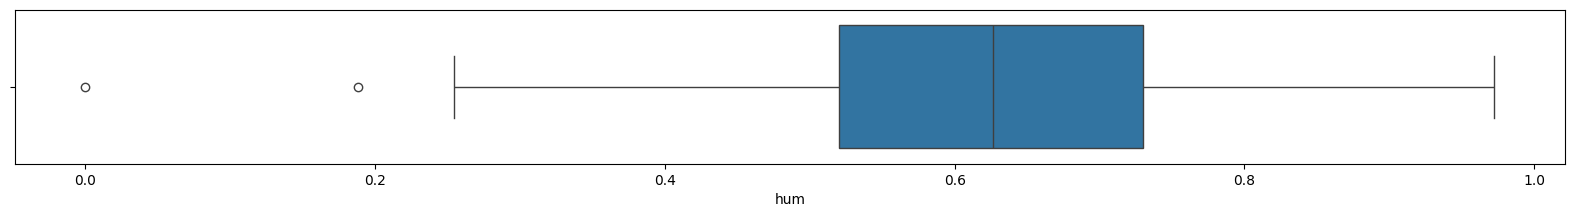

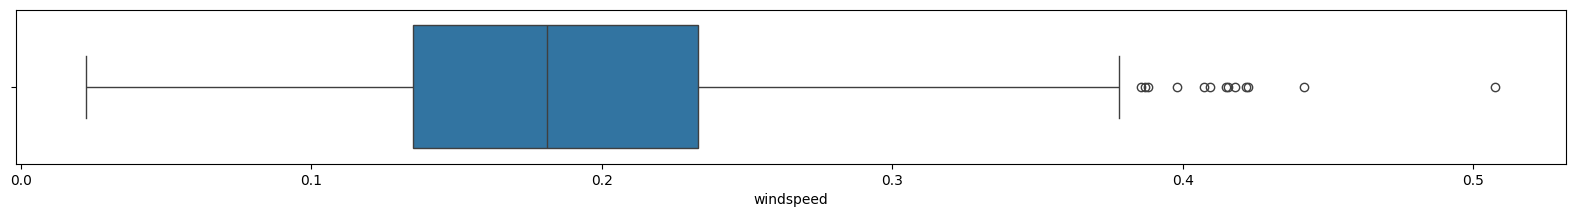

In [102]:
# Cek outlier pada tabel day
df_numerik_kontinu_day = day_df.select_dtypes(include=['float64'])
for column in df_numerik_kontinu_day:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_numerik_kontinu_day, x=column)

#### Menilai tabel hour

In [103]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [104]:
# Melihat parameter statistik tabel hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [105]:
# Cek duplikasi data pada tabel hour
print('Jumlah duplikasi tabel hour: ', hour_df.duplicated().sum())

Jumlah duplikasi tabel hour:  0


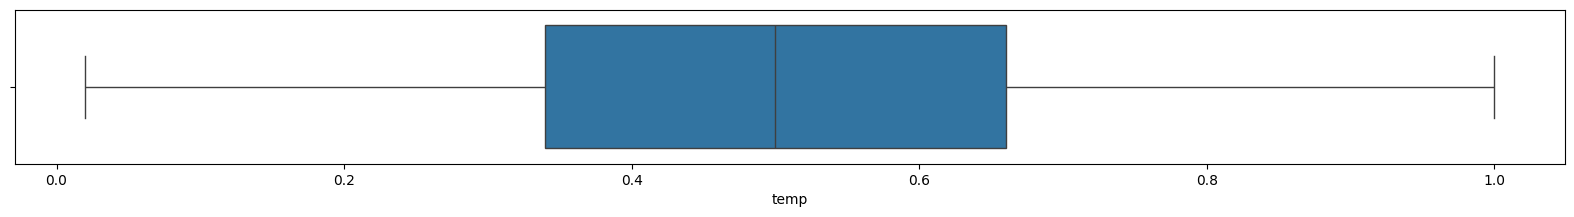

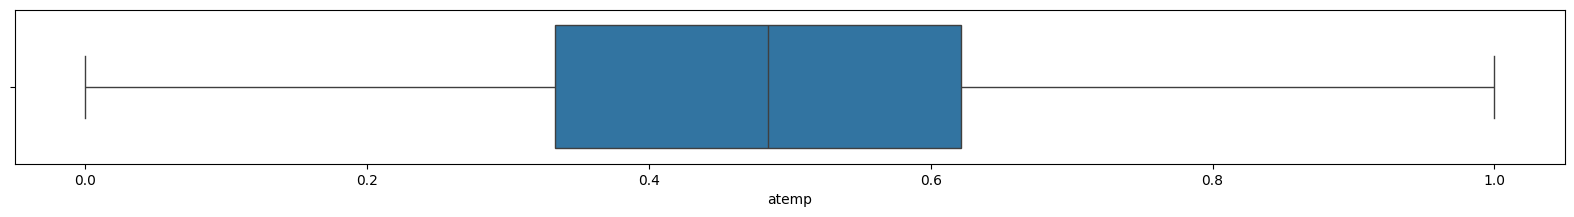

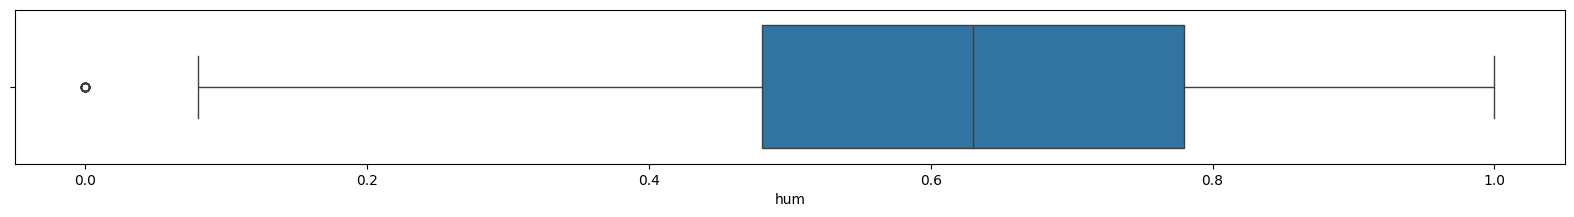

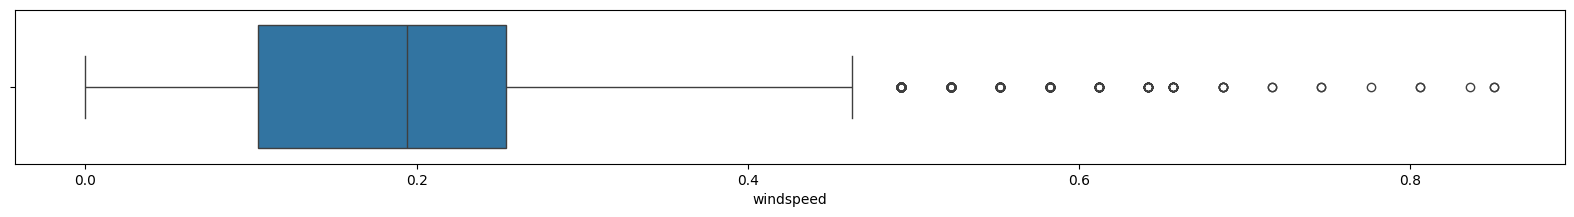

In [106]:
# Cek outlier pada tabel hour
df_numerik_kontinu_hour = hour_df.select_dtypes(include=['float64'])
for column in df_numerik_kontinu_hour:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_numerik_kontinu_hour, x=column)

**Insight:**
- Tidak ada data yang hilang (missing value) maupun data duplikat.
- Terdapat outlier pada kolom windspeed dan hum baik pada dataframe day maupun dataframe hour
- Hapus kolom instant (nilai unik) karena tidak dibutuhkan dalam analisis
- Tipe data dteday di kedua tabel perlu diubah dari objek menjadi datetime.
- Menyatukan kolom workingday dan holiday menjadi 1 kolom daytype.
- Kolom kategorikal yang diubah ke numerik perlu diubah kembali agar mudah untuk dibaca dan divisualisasi.
- Nama kolom yang kurang jelas perlu di-rename.

### Cleaning Data

#### Menangani outlier

In [107]:
# Fungsi untuk menangani outlier dengan metode imputation
def handle_outliers(df):
    # Pilih kolom numerik kontinu
    df_numerik_kontinu = df.select_dtypes(include=['float64'])

    # Hitung Q1, Q3, dan IQR
    q1 = df_numerik_kontinu.quantile(0.25)
    q3 = df_numerik_kontinu.quantile(0.75)
    iqr = q3 - q1

    # Tentukan batas bawah dan atas
    minimum = q1 - 1.5 * iqr
    maximum = q3 + 1.5 * iqr

    # Melakukan imputasi dengan ganti outlier dengan batas minimum/maksimum
    for col in df_numerik_kontinu.columns:
        df[col] = df[col].mask(df[col] < minimum[col], minimum[col])
        df[col] = df[col].mask(df[col] > maximum[col], maximum[col])

    return df

In [108]:
# Tangani outlier pada tabel day dan hour
day_df = handle_outliers(day_df)
hour_df = handle_outliers(hour_df)

#### Menghapus kolom instant

In [109]:
# Hapus kolom instant
day_df.drop(['instant'],axis=1,inplace=True)
hour_df.drop(['instant'],axis=1,inplace=True)

#### Menubah tipe data dteday

In [110]:
# Ubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#### Membuat kolom day_type berdasarkan kolom workingday dan holiday

In [111]:
# Fungsi memetakan tipe hari
def classify_day(row):
    if row['holiday'] == 1:
        return 'Holiday'
    elif row['workingday'] == 1:
        return 'Workday'
    else:
        return 'Weekend'

In [112]:
# Menyatukan kolom workingday dan holiday menjadi 1 kolom day_type yang bernilai 'holiday', 'workingday', dan 'weekend'

# Panggil fungsi untuk memetakan tipe hari ke kolom baru, day_type
day_df['day_type'] = day_df.apply(classify_day, axis=1)
# Hapus kolom workingday dan holiday
day_df.drop(columns=['workingday', 'holiday'], inplace=True)
# Tampilkan 5 baris teratas tabel day
day_df.head()

,dteday,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_type
0,2011-01-01,1,0,1,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Weekend
1,2011-01-02,1,0,1,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Weekend
2,2011-01-03,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Workday
3,2011-01-04,1,0,1,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Workday
4,2011-01-05,1,0,1,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Workday


In [113]:
# Menyatukan kolom workingday dan holiday menjadi 1 kolom day_type yang bernilai 'holiday', 'workingday', dan 'weekend' untuk tabel hour

hour_df['day_type'] = hour_df.apply(classify_day, axis=1)
hour_df.drop(columns=['workingday', 'holiday'], inplace=True)
hour_df.head()

,dteday,season,yr,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_type
0,2011-01-01,1,0,1,0,6,1,0.24,0.2879,0.81,0.0,3,13,16,Weekend
1,2011-01-01,1,0,1,1,6,1,0.22,0.2727,0.80,0.0,8,32,40,Weekend
2,2011-01-01,1,0,1,2,6,1,0.22,0.2727,0.80,0.0,5,27,32,Weekend
3,2011-01-01,1,0,1,3,6,1,0.24,0.2879,0.75,0.0,3,10,13,Weekend
4,2011-01-01,1,0,1,4,6,1,0.24,0.2879,0.75,0.0,0,1,1,Weekend


#### Menubah kolom kategorikal

In [114]:
# Mapping nilai dengan replace untuk day_df
day_df.replace({
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: 2011, 1: 2012},
    'mnth': {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'},
    'weekday': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'},
    'weathersit': {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'}
}, inplace=True)

# Mapping untuk hour_df
hour_df.replace({
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: 2011, 1: 2012},
    'mnth': {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'},
    'weekday': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'},
    'weathersit': {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'}
}, inplace=True)

In [115]:
categorical_columns = ['season', 'yr', 'mnth', 'weekday', 'weathersit', 'day_type']
for col in categorical_columns:
    day_df[col] = day_df[col].astype('category')
    hour_df[col] = hour_df[col].astype('category')

In [116]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  int64         
 5   weekday     17379 non-null  category      
 6   weathersit  17379 non-null  category      
 7   temp        17379 non-null  float64       
 8   atemp       17379 non-null  float64       
 9   hum         17379 non-null  float64       
 10  windspeed   17379 non-null  float64       
 11  casual      17379 non-null  int64         
 12  registered  17379 non-null  int64         
 13  cnt         17379 non-null  int64         
 14  day_type    17379 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(4), int64(4)
memory usage: 

#### Rename nama kolom agar mudah dibaca

In [117]:
# Mengubah nama kolom day_df
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'hum': 'humidity',
    'cnt': 'count_rental'
}, inplace=True)

# Mengubah nama kolom hour_df
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather',
    'hum': 'humidity',
    'cnt': 'count_rental'
}, inplace=True)

print(day_df.columns)
print(hour_df.columns)


Index(['date', 'season', 'year', 'month', 'weekday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count_rental', 'day_type'],
      dtype='object')
Index(['date', 'season', 'year', 'month', 'hour', 'weekday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count_rental', 'day_type'],
      dtype='object')


**Insight:**
- Tangani outlier ✔️
- Drop kolom yang tidak dibutuhkan ✔️
- Ubah tipe data kolom date ✔️
- satukan kolom workingday dan holiday menjadi satu kolom (day_type) ✔️
- Ubah nilai dari kolom kategorikal ✔️
- Ubah nama kolom agar mudah dipahami ✔️


## Exploratory Data Analysis (EDA)

### Explore ...

#### Explore data tabel day

In [118]:
# Melihat parameter statistik tabel day
day_df.describe(include='all')

,date,season,year,month,weekday,weather,temp,atemp,humidity,windspeed,casual,registered,count_rental,day_type
count,731,731,731.0,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,4,2.0,12,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Fall,2012.0,August,Monday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workday
freq,NaN,188,366.0,62,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.628197,0.189846,848.176471,3656.172367,4504.348837,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.204687,0.022392,2.000000,20.000000,22.000000,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.380611,3410.000000,6946.000000,8714.000000,NaN


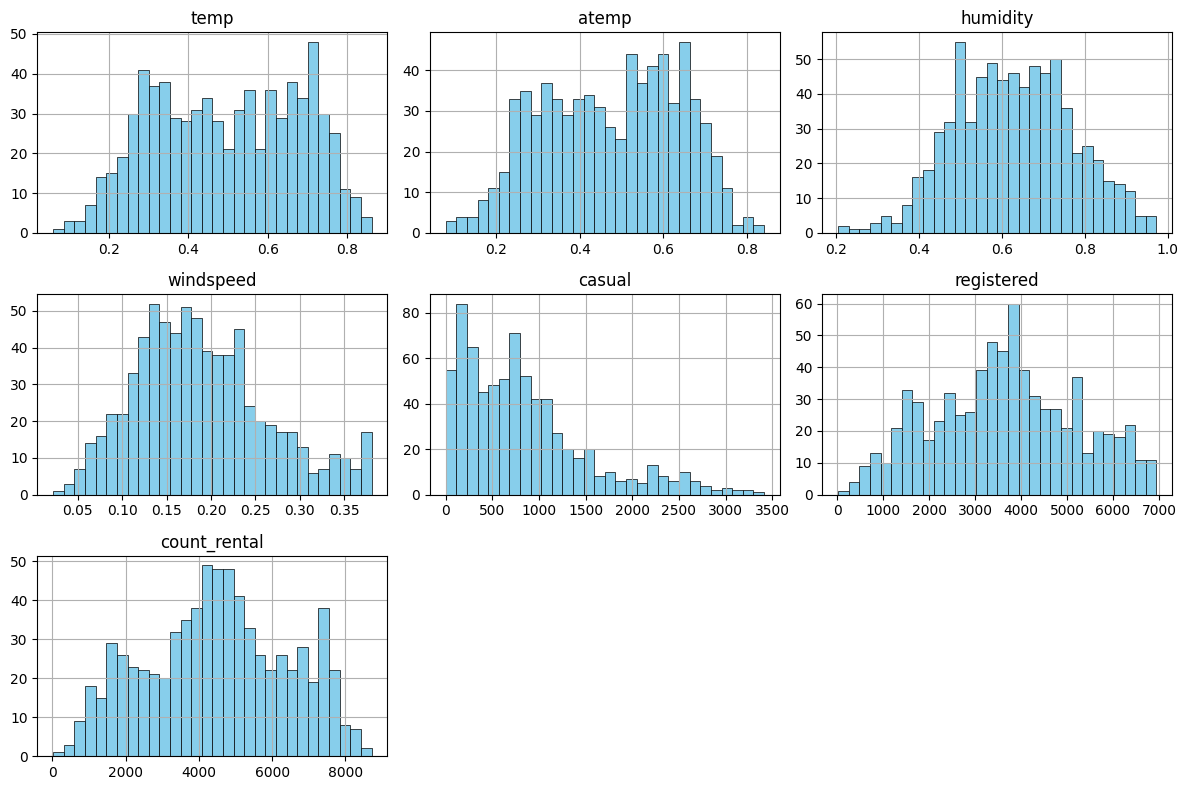

In [119]:
df_numerik_day = day_df.select_dtypes(include=['number'])
df_numerik_day.hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black', linewidth=0.5, grid=True)

plt.tight_layout()
plt.show()

- Rata rata kolom numerik terdistribusi normal.
- Variabel kasual memiliki distribusi right skewed menunjukkan bahwa sebagian besar hari memiliki jumlah penyewa yang relatif rendah, tetapi ada beberapa hari tertentu dengan jumlah penyewa yang sangat tinggi.

In [120]:
df_numerik_day.corr()

,temp,atemp,humidity,windspeed,casual,registered,count_rental
temp,1.000000,0.991702,0.126722,-0.156916,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139924,-0.182948,0.543864,0.544192,0.631066
humidity,0.126722,0.139924,1.000000,-0.241160,-0.080005,-0.095985,-0.105664
windspeed,-0.156916,-0.182948,-0.241160,1.000000,-0.166295,-0.216927,-0.233657
casual,0.543285,0.543864,-0.080005,-0.166295,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.095985,-0.216927,0.395282,1.000000,0.945517
count_rental,0.627494,0.631066,-0.105664,-0.233657,0.672804,0.945517,1.000000


- **Suhu (temp dan atemp) berpengaruh positif terhadap jumlah penyewa (count_rental)** dengan korelasi temp dengan count_rental sebesar **0.627**, sedangkan atemp (suhu yang dirasakan) sebesar **0.631** Menunjukkan bahwa semakin tinggi suhu, semakin banyak penyewa yang menggunakan sepeda.

- **Kelembapan (humidity) memiliki pengaruh negatif lemah terhadap jumlah penyewa** dengan korelasi sebesar **-0.106**, menunjukkan bahwa ketika kelembapan tinggi, jumlah penyewa cenderung sedikit berkurang, tetapi pengaruhnya sangat kecil.

- **Kecepatan angin (windspeed) juga memiliki pengaruh negatif terhadap jumlah penyewa** dengan korelasi sebesar **-0.234**, menunjukkan bahwa saat kecepatan angin meningkat, jumlah penyewa cenderung berkurang, meskipun pengaruhnya tidak terlalu besar.

In [121]:
# Melihat tren peminjaman sepeda saat hari kerja (workday), akhir pekan (weekend), dan hari libur (holiday) terhadap pengguna kasual dan pengguna terdaftar.
day_df.groupby(by="day_type", observed=False).agg({
    "casual" : ["mean", "sum"],
    "registered" : ["mean", "sum"],
    "count_rental" : ["mean", "sum"]
})

casual           registered          count_rental         
                 mean     sum         mean      sum         mean      sum
day_type                                                                 
Holiday   1064.714286   22359  2670.285714    56076  3735.000000    78435
Weekend   1401.776190  294373  2987.909524   627461  4389.685714   921834
Workday    606.570000  303285  3978.250000  1989125  4584.820000  2292410

- **Pengguna terdaftar (registered)** lebih dominan di **hari kerja**
- Sedangkan **pengguna kasual** lebih banyak menyewa di **akhir pekan** dan **hari libur**.
- Total peminjaman sepeda paling banyak terjadi di hari kerja, tetapi rata-rata peminjaman per hari tidak jauh berbeda antara hari kerja dan akhir pekan.

In [122]:
# Melihat tren peminjaman sepeda berdasarkan musim
day_df.groupby(by="season", observed=False).agg({
    "count_rental" : "mean"
})

,count_rental
season,
Fall,5644.303191
Spring,2604.132597
Summer,4992.331522
Winter,4728.162921


- **Musim gugur (Fall)** memiliki rata-rata peminjaman sepeda tertinggi (5644.30), diikuti oleh **musim panas (Summer)** (4992.33).
- **Musim semi (Spring)** memiliki rata-rata peminjaman sepeda terendah (2604.13).
- **Musim dingin (Winter)** masih memiliki cukup banyak peminjaman (4728.16), lebih tinggi dibanding musim semi.

#### Explore data hour

In [123]:
# Melihat parameter statistik tabel hour
hour_df.describe(include='all')

,date,season,year,month,hour,weekday,weather,temp,atemp,humidity,windspeed,casual,registered,count_rental,day_type
count,17379,17379,17379.0,17379,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,4,2.0,12,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Fall,2012.0,July,NaN,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workday
freq,NaN,4496,8734.0,1488,NaN,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11865
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,0.496987,0.475775,0.627267,0.188691,35.676218,153.786869,189.463088,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.020000,0.000000,0.030000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,1.000000,1.000000,1.000000,0.477500,367.000000,886.000000,977.000000,NaN


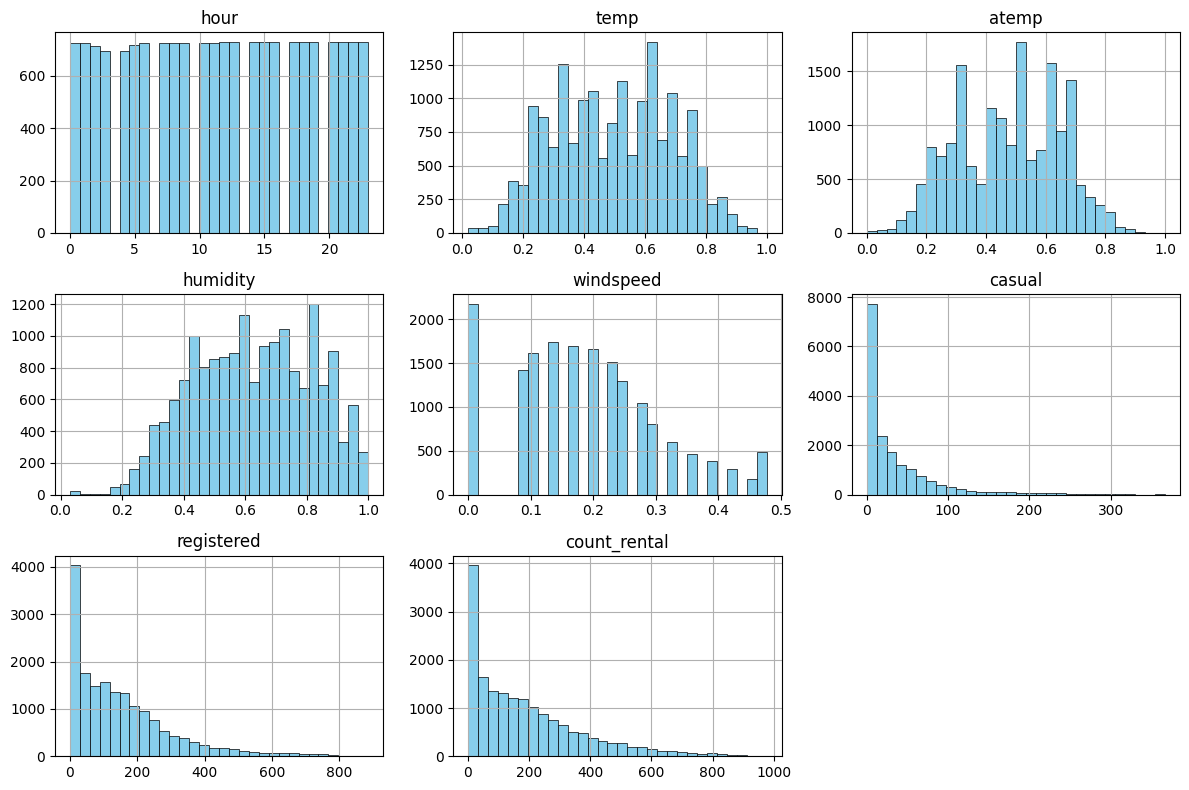

In [124]:
df_numerik_hour = hour_df.select_dtypes(include=['number'])
df_numerik_hour.hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black', linewidth=0.5, grid=True)

plt.tight_layout()
plt.show()

- Variabel temp dan atemp terdistribusi normal.
- Variabel humidity memiliki distribusi hampir normal dengan sedikit skewness ke kanan, menunjukkan bahwa sebagian besar jam dalam sehari memiliki kelembapan sedang hingga tinggi.
- kolom windspeed, casual, register, dan count_rental memiliki distribusi right skewed menunjukkan bahwa sebagian besar jam per hari memiliki kecepatan angin dan jumlah penyewa yang relatif rendah, tetapi ada beberapa hari tertentu dengan kecepatan angin dan jumlah penyewa yang sangat tinggi.

In [125]:
df_numerik_hour.corr()

,hour,temp,atemp,humidity,windspeed,casual,registered,count_rental
hour,1.000000,0.137603,0.133750,-0.276651,0.137979,0.301202,0.374141,0.394071
temp,0.137603,1.000000,0.987672,-0.070035,-0.020202,0.459616,0.335361,0.404772
atemp,0.133750,0.987672,1.000000,-0.052053,-0.059597,0.454080,0.332559,0.400929
humidity,-0.276651,-0.070035,-0.052053,1.000000,-0.290708,-0.347379,-0.274270,-0.323288
windspeed,0.137979,-0.020202,-0.059597,-0.290708,1.000000,0.094614,0.086603,0.097983
casual,0.301202,0.459616,0.454080,-0.347379,0.094614,1.000000,0.506618,0.694564
registered,0.374141,0.335361,0.332559,-0.274270,0.086603,0.506618,1.000000,0.972151
count_rental,0.394071,0.404772,0.400929,-0.323288,0.097983,0.694564,0.972151,1.000000


- **Jam berpengaruh terhadap jumlah penyewa** dengan korelasi positif sedang (**0.39**), menunjukkan bahwa peminjaman cenderung lebih tinggi pada waktu tertentu dalam sehari (kemungkinan sore/malam).
- **Suhu mempengaruhi jumlah penyewa** dengan korelasi positif sedang (**0.40**), artinya jumlah penyewa meningkat ketika suhu lebih tinggi.
- **Kelembapan memiliki dampak negatif terhadap jumlah penyewa** dengan korelasi **-0.32**, menunjukkan bahwa saat kelembapan tinggi, orang cenderung lebih sedikit menyewa sepeda.

In [126]:
# Melihat jam sibuk peminjaman sepeda
hour_df.groupby(by="hour").agg({
    "count_rental" : "mean"
})

,count_rental
hour,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


- **Puncak peminjaman** sepeda terjadi sekitar **pukul 17:00** dengan rata rata total peminjaman sekitar 461 sepeda. Jam sibuk lainnya terjadi pada pukul 8:00 - 9:00, di mana terjadi lonjakan jumlah peminjaman.


In [127]:
# Melihat tren peminjaman sepeda berdasarkan cuaca
hour_df.groupby(by='weather', observed=False).agg({
    "casual" : "mean",
    "registered" : "mean",
    "count_rental" : "mean"
})

,casual,registered,count_rental
weather,,,
Clear,40.545431,164.323841,204.869272
Cloudy,29.595290,145.570202,175.165493
Heavy Rain,2.666667,71.666667,74.333333
Light Rain,16.055673,95.523608,111.579281


- Cuaca Cerah (Clear) Memiliki Jumlah peminjaman Tertinggi
- Cuaca Berawan (Cloudy) Masih Menunjukkan peminjaman yang Relatif Tinggi
- peminjaman Menurun Drastis Saat Hujan Deras (Heavy Rain) dan Hujan Ringan (Light Rain)

**Insight:**
- **Pengguna terdaftar kemungkinan besar menggunakan sepeda untuk keperluan harian**, seperti perjalanan kerja atau sekolah, terlihat dari lonjakan di pagi hari dan sore hari. **Pengguna kasual lebih banyak menyewa pada jam tengah hari hingga sore**, yang bisa mengindikasikan penggunaan untuk rekreasi atau kegiatan santai.
- peminjaman sepeda cenderung lebih tinggi di **musim gugur dan musim panas**, kemungkinan karena cuaca yang lebih nyaman untuk bersepeda.
- **Suhu adalah faktor lingkungan yang paling berpengaruh terhadap jumlah penyewa**. Kelembapan dan kecepatan angin memiliki sedikit pengaruh negatif, tetapi tidak terlalu signifikan.
- **Cuaca cerah dan berawan adalah kondisi terbaik untuk peminjaman sepeda**, dengan lebih banyak pengguna, terutama yang terdaftar. **Hujan deras dan hujan ringan sangat mengurangi jumlah peminjaman**, yang menunjukkan bahwa pengguna lebih memilih alternatif transportasi lain saat cuaca buruk.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa peminjaman sepeda dua tahun terakhir?

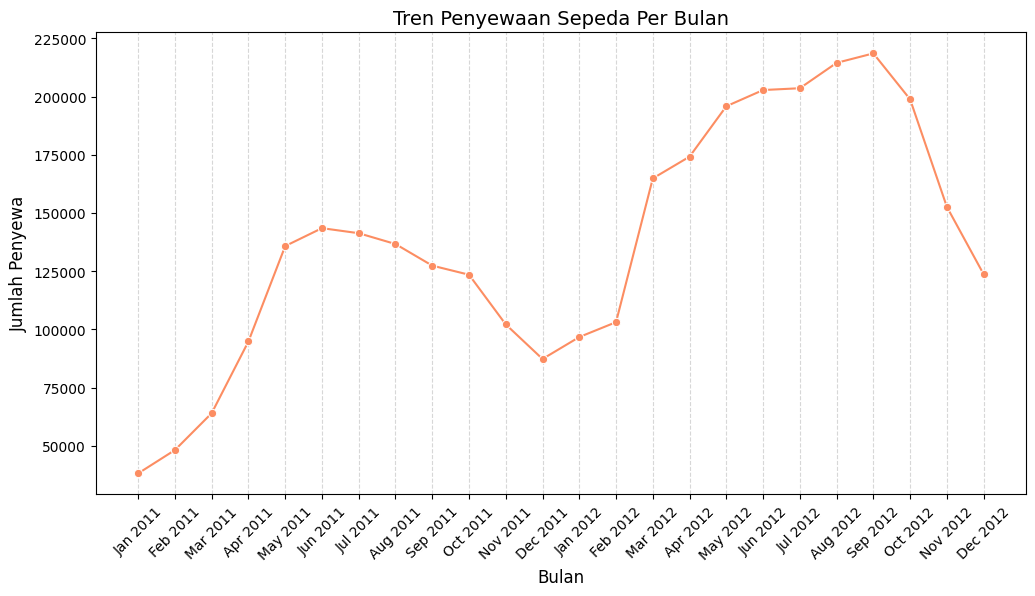

In [128]:
monthly_trend_df = day_df.resample(rule='ME', on='date').agg({
    "count_rental": "sum"
})
monthly_trend_df.index = monthly_trend_df.index.strftime('%b %Y')

monthly_trend_df = monthly_trend_df.reset_index()
monthly_trend_df.rename(columns={
    "count_rental": "Total peminjaman",
    "date": "Bulan"
}, inplace=True)

set2_palette = sns.color_palette("Set2")
line_color = set2_palette[1]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Bulan', y='Total peminjaman', data=monthly_trend_df, marker='o', color=line_color)
plt.title("Tren peminjaman Sepeda Per Bulan", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Penyewa", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

Performa peminjaman sepeda meningkat sejak 2 tahun terakhir, tetapi terjadi penurunan pada akhir tahun.

#### Pertanyaan 2: Apakah hari tertentu memiliki pola peminjaman yang lebih tinggi?

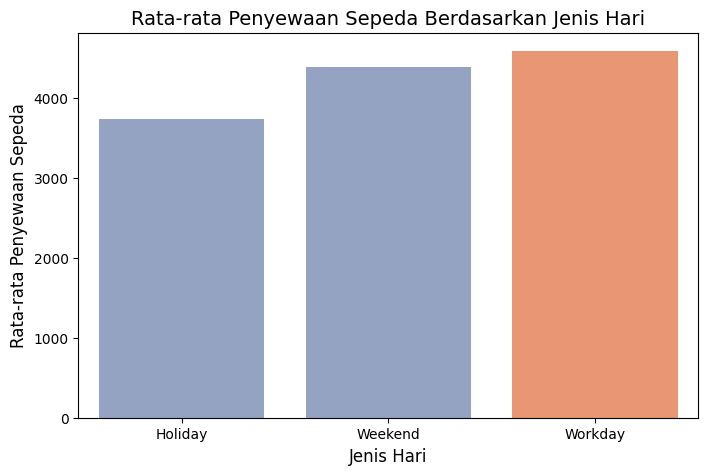

In [129]:
day_type_trend = day_df.groupby('day_type', observed=True)['count_rental'].mean().reset_index()

max_value = day_type_trend['count_rental'].max()
colors = [set2_palette[1] if val == max_value else set2_palette[2] for val in day_type_trend['count_rental']]

plt.figure(figsize=(8, 5))
sns.barplot(x='day_type', y='count_rental', data=day_type_trend, hue='day_type', palette=colors, legend=False)

plt.title("Rata-rata peminjaman Sepeda Berdasarkan Jenis Hari", fontsize=14)
plt.xlabel("Jenis Hari", fontsize=12)
plt.ylabel("Rata-rata peminjaman Sepeda", fontsize=12)

plt.show()

- Workday memiliki jumlah peminjaman tertinggi
- Weekend memiliki jumlah peminjaman yang cukup tinggi, tetapi masih di bawah hari kerja
- Holiday memiliki jumlah peminjaman terendah

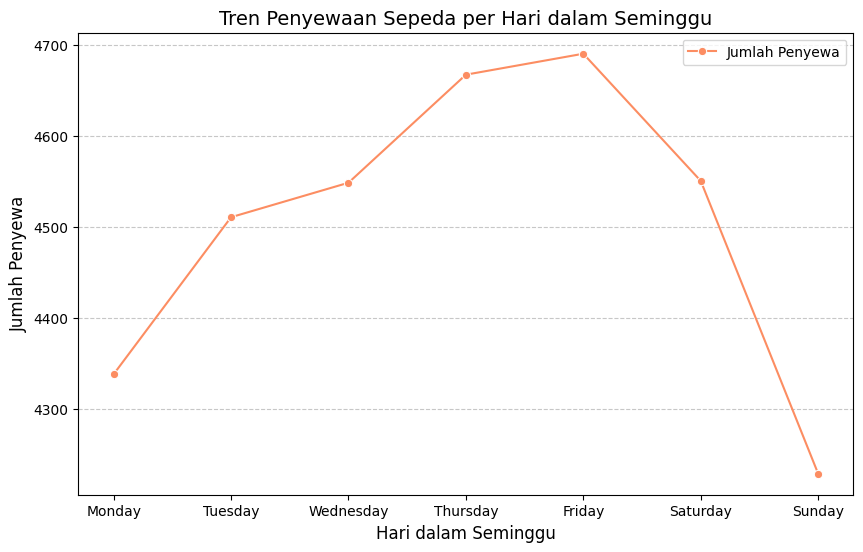

In [130]:
weekly_trend = day_df.groupby('weekday', observed=False).agg({
    'count_rental': 'mean'
}).reset_index()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_trend['weekday'] = pd.Categorical(weekly_trend['weekday'], categories=weekday_order, ordered=True)
weekly_trend = weekly_trend.sort_values('weekday')

plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='count_rental', data=weekly_trend, label="Jumlah Penyewa", marker='o', color=line_color)

plt.title("Tren peminjaman Sepeda per Hari dalam Seminggu", fontsize=14)
plt.xlabel("Hari dalam Seminggu", fontsize=12)
plt.ylabel("Jumlah Penyewa", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

peminjaman cenderung meningkat dari Senin hingga Jumat dan Penurunan signifikan pada hari Sabtu dan Minggu

#### Pertanyaan 3: Apakah ada musim tertentu di mana peminjaman sepeda meningkat secara signifikan?

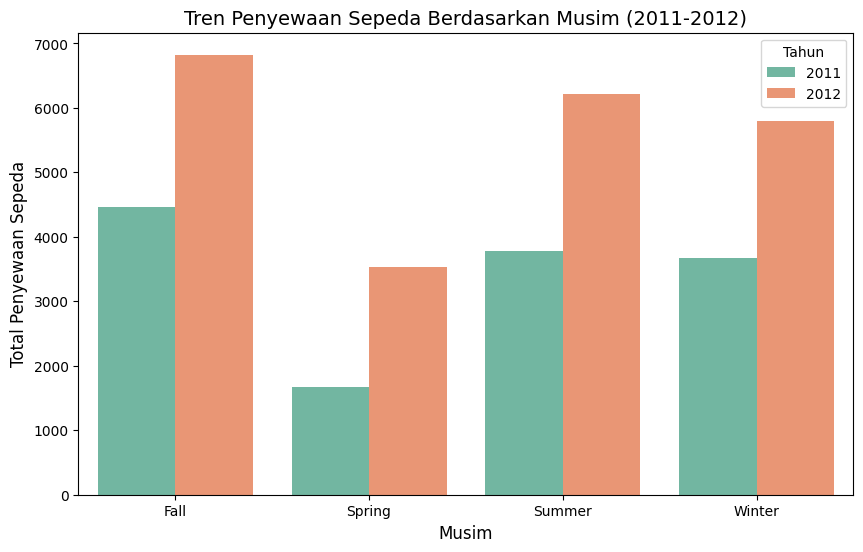

In [131]:
seasonal_trend = day_df.groupby(['year', 'season'], observed=True)['count_rental'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count_rental', hue='year', data=seasonal_trend, palette=set2_palette[:2])
plt.title("Tren peminjaman Sepeda Berdasarkan Musim (2011-2012)", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Total peminjaman Sepeda", fontsize=12)
plt.legend(title="Tahun")
plt.show()

- Musim Gugur (Fall) memiliki jumlah peminjaman tertinggi, terutama pada tahun 2012.
- Musim Panas (Summer) juga memiliki angka peminjaman yang tinggi, meskipun masih di bawah musim gugur.

### Pertanyaan 4: Bagaimana pengaruh kondisi lingkungan (weathersit, suhu, kelembapan, kecepatan angin) terhadap jumlah peminjaman sepeda?

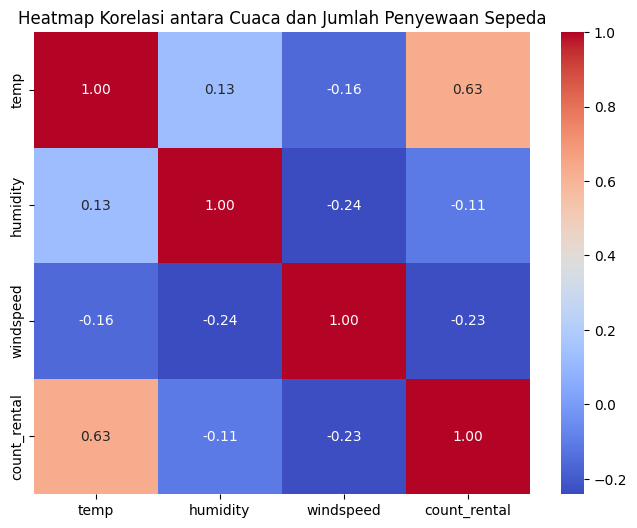

In [132]:
# Mengecek korelasi antara variabel cuaca dan jumlah peminjaman sepeda
correlation_matrix = day_df[['temp', 'humidity', 'windspeed', 'count_rental']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antara Cuaca dan Jumlah peminjaman Sepeda")
plt.show()

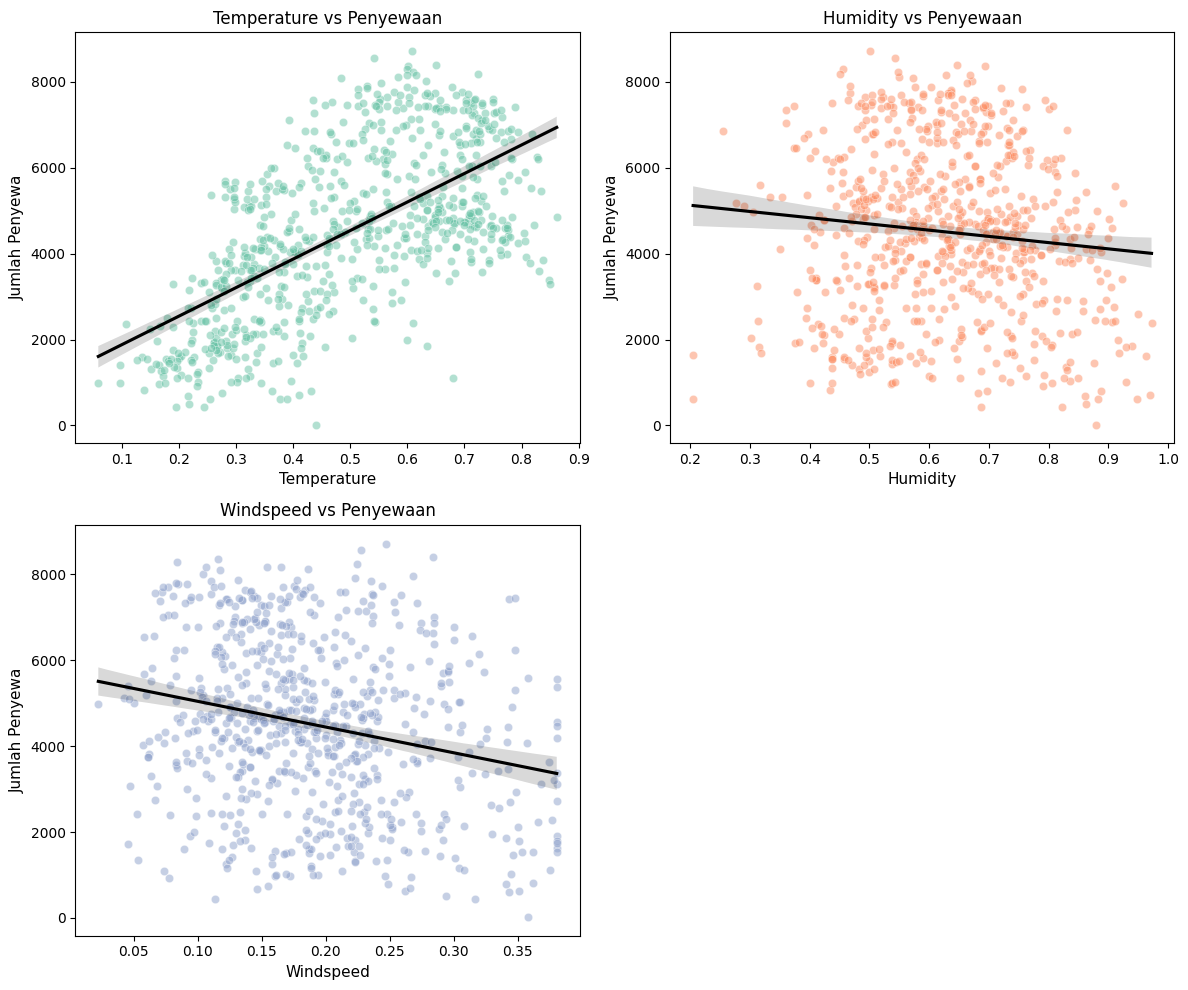

In [133]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot untuk Temperature vs peminjaman
sns.scatterplot(data=day_df, x='temp', y='count_rental', ax=axes[0, 0], alpha=0.5, color=set2_palette[0])
sns.regplot(data=day_df, x='temp', y='count_rental', ax=axes[0, 0], scatter=False, color='black')
axes[0, 0].set_title("Temperature vs peminjaman", fontsize=12)
axes[0, 0].set_xlabel("Temperature", fontsize=11)
axes[0, 0].set_ylabel("Jumlah Penyewa", fontsize=11)

# Scatter plot untuk Humidity vs peminjaman
sns.scatterplot(data=day_df, x='humidity', y='count_rental', ax=axes[0, 1], alpha=0.5, color=set2_palette[1])
sns.regplot(data=day_df, x='humidity', y='count_rental', ax=axes[0, 1], scatter=False, color='black')
axes[0, 1].set_title("Humidity vs peminjaman", fontsize=12)
axes[0, 1].set_xlabel("Humidity", fontsize=11)
axes[0, 1].set_ylabel("Jumlah Penyewa", fontsize=11)

# Scatter plot untuk Windspeed vs peminjaman
sns.scatterplot(data=day_df, x='windspeed', y='count_rental', ax=axes[1, 0], alpha=0.5, color=set2_palette[2])
sns.regplot(data=day_df, x='windspeed', y='count_rental', ax=axes[1, 0], scatter=False, color='black')
axes[1, 0].set_title("Windspeed vs peminjaman", fontsize=12)
axes[1, 0].set_xlabel("Windspeed", fontsize=11)
axes[1, 0].set_ylabel("Jumlah Penyewa", fontsize=11)

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()


- Suhu (temp) berpengaruh positif terhadap jumlah penyewa (count_rental) dengan korelasi temp dengan count_rental sebesar 0.63, menunjukkan bahwa semakin tinggi suhu, semakin banyak penyewa yang menggunakan sepeda.

- Kelembapan (humidity) memiliki pengaruh negatif lemah terhadap jumlah penyewa dengan korelasi sebesar -0.11, menunjukkan bahwa ketika kelembapan tinggi, jumlah penyewa cenderung sedikit berkurang, tetapi pengaruhnya sangat kecil.

- Kecepatan angin (windspeed) juga memiliki pengaruh negatif terhadap jumlah penyewa dengan korelasi sebesar -0.23, menunjukkan bahwa saat kecepatan angin meningkat, jumlah penyewa cenderung berkurang, meskipun pengaruhnya tidak terlalu besar.

### Pertanyaan 5: Bagaimana pola penggunaan antara pengguna kasual dan pengguna terdaftar?

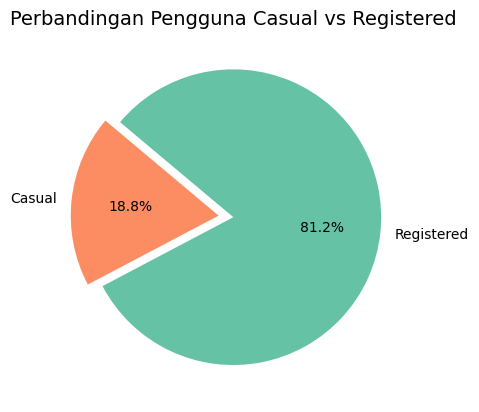

In [134]:
# Perbandingan total penyewa sepeda kasual dan terdaftar selama 2 tahun.
total_casual = day_df["casual"].sum()
total_registered = day_df["registered"].sum()

labels = ["Casual", "Registered"]
sizes = [total_casual, total_registered]
colors = [set2_palette[1], set2_palette[0]]
explode = (0.1, 0)

plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, explode=explode, startangle=140)
plt.title("Perbandingan Pengguna Casual vs Registered", fontsize=14)
plt.show()

Pengguna terdaftar lebih banyak melakukan peminjaman sepeda

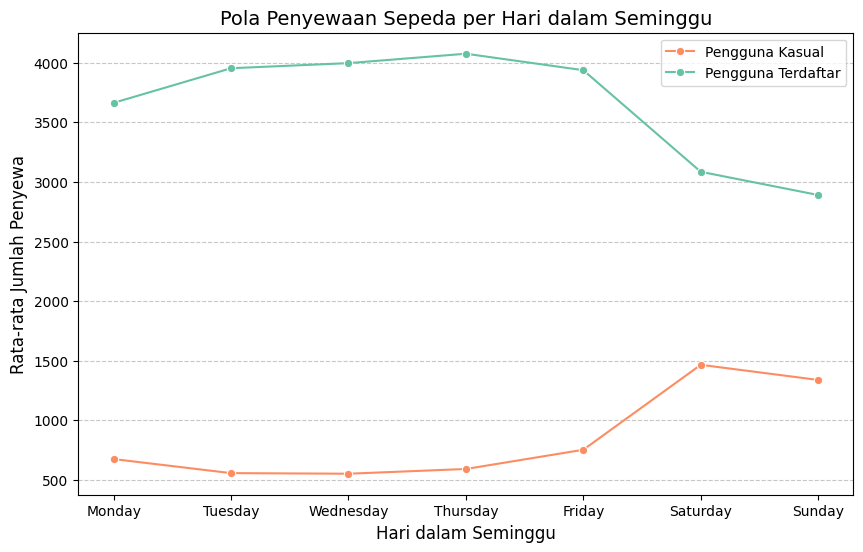

In [135]:
weekly_trend = day_df.groupby('weekday', observed=False).agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Mengurutkan berdasarkan urutan hari (Senin-Minggu)
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_trend['weekday'] = pd.Categorical(weekly_trend['weekday'], categories=weekday_order, ordered=True)
weekly_trend = weekly_trend.sort_values('weekday')

plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='casual', data=weekly_trend, label="Pengguna Kasual", marker='o', color=set2_palette[1])
sns.lineplot(x='weekday', y='registered', data=weekly_trend, label="Pengguna Terdaftar", marker='o', color=set2_palette[0])

plt.title("Pola peminjaman Sepeda per Hari dalam Seminggu", fontsize=14)
plt.xlabel("Hari dalam Seminggu", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewa", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Pengguna terdaftar menurun angkanya pada hari sabtu dan minggu, sedangkan pengguna kasual sebaliknya.

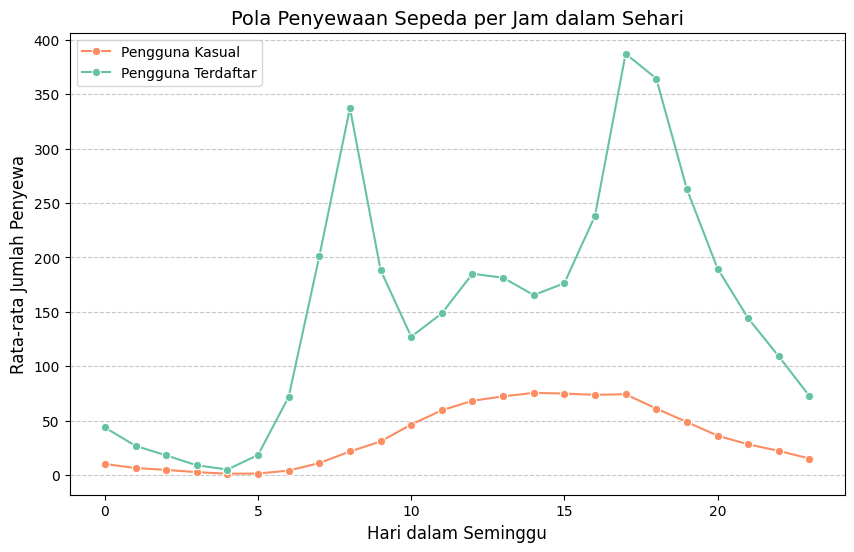

In [136]:
weekly_trend = hour_df.groupby('hour', observed=False).agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='casual', data=weekly_trend, label="Pengguna Kasual", marker='o', color=set2_palette[1])
sns.lineplot(x='hour', y='registered', data=weekly_trend, label="Pengguna Terdaftar", marker='o', color=set2_palette[0])

plt.title("Pola peminjaman Sepeda per Jam dalam Sehari", fontsize=14)
plt.xlabel("Hari dalam Seminggu", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewa", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- Pengguna terdaftar (garis biru) memiliki pola peminjaman dengan dua puncak utama, yaitu pagi hari (08:00) dan
Sore hari (17:00 - 18:00).
- Pengguna kasual (garis oranye) memiliki pola yang lebih stabil sepanjang hari, dengan peminjaman meningkat secara bertahap hingga siang/malam.

**Insight:**
Tahapan explanatory analysis tealh dilakukan untuk menjawab pertanyaan seputar tren musiman, faktor eksternal (cuaca dan kondisi lingkungan), dan preferensi pelanggan terhadap peminjaman sepeda.

## Analisis Lanjutan (Opsional)

### Segmentasi Jumlah peminjaman Sepeda Berdasarkan Waktu dengan Binning

Teknik binning (qcut) digunakan untuk mengelompokkan jumlah peminjaman sepeda per jam ke dalam tiga kategori:
- Low (rendah): Jumlah peminjaman yang tergolong sedikit.
- Medium (sedang): Jumlah peminjaman dalam kisaran menengah.
- High (tinggi): Jumlah peminjaman yang tergolong banyak.

Tujuan utama dari clustering ini adalah untuk memahami pola peminjaman sepeda sepanjang hari dan mengidentifikasi jam-jam sibuk serta jam-jam sepi.

In [137]:
hour_df['Cluster'] = pd.qcut(hour_df['count_rental'], q=3, labels=['Low', 'Medium', 'High'])
hour_df[['hour', 'count_rental', 'Cluster']].head()

,hour,count_rental,Cluster
0,0,16,Low
1,1,40,Low
2,2,32,Low
3,3,13,Low
4,4,1,Low


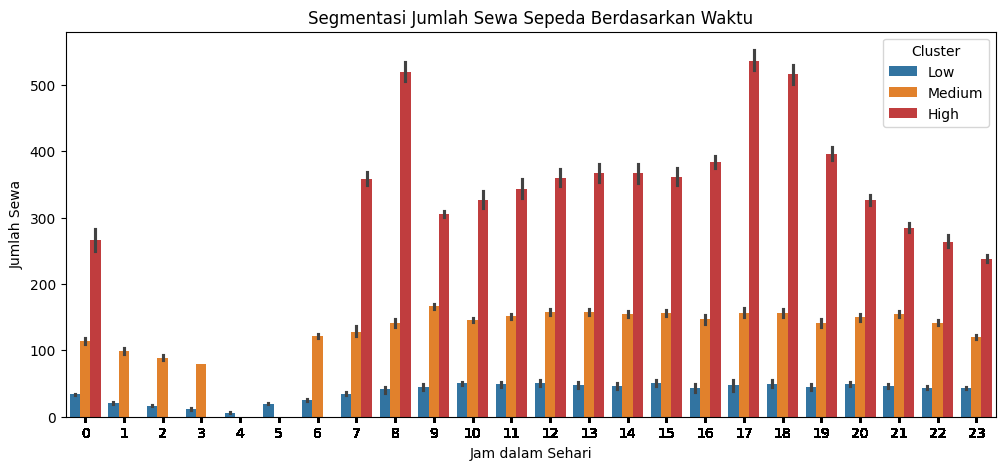

In [138]:
# Warna untuk setiap cluster
cluster_colors = {'Low': '#1f77b4', 'Medium': '#ff7f0e', 'High': '#d62728'}

# Plot bar chart
plt.figure(figsize=(12, 5))
sns.barplot(x='hour', y='count_rental', hue='Cluster', data=hour_df, palette=cluster_colors)

plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah peminjaman")
plt.title("Segmentasi Jumlah peminjaman Sepeda Berdasarkan Waktu")
plt.legend(title="Cluster")
plt.xticks(hour_df['hour'])  # Pastikan semua jam ditampilkan
plt.show()

- **Jam dengan peminjaman Tinggi (High - Merah)**: Terjadi lonjakan signifikan pada jam 8 pagi dan 17-18 sore, yang kemungkinan besar terkait dengan jam kerja (morning & evening rush hours).
Banyak orang menyewa sepeda untuk pergi dan pulang kerja/sekolah.
- **Jam dengan peminjaman Sedang (Medium - Oranye)**: peminjaman sepeda berada di tingkat menengah pada jam 6-7 pagi, 9-11 siang, serta 14-16 sore dan 20-23 malam.
Ini bisa mencerminkan waktu luang, istirahat makan siang, atau aktivitas rekreasi.
- **Jam dengan peminjaman Rendah (Low - Biru)**: peminjaman cenderung rendah antara tengah malam hingga subuh (0-5 pagi) dan beberapa jam di siang hari.
Aktivitas peminjaman sepeda minim di waktu-waktu ini karena mayoritas orang sedang tidur.

## Conclusion

1. Bagaimana performa peminjaman sepeda dua tahun terakhir?
2. Apakah hari tertentu memiliki pola peminjaman yang lebih tinggi?
3. Apakah ada musim tertentu di mana peminjaman sepeda meningkat secara signifikan?
4. Bagaimana pengaruh kondisi lingkungan (suhu, kelembapan, kecepatan angin) terhadap jumlah peminjaman sepeda?
5. Bagaimana pola penggunaan antara pengguna kasual dan pengguna terdaftar?


- Conclution pertanyaan 1:
  - Performa peminjaman sepeda meningkat sejak 2 tahun terakhir, tetapi terjadi penurunan pada akhir tahun.
  - Pola tahunan yang berulang, awal tahun 2012 menunjukkan pola yang mirip dengan 2011, dengan jumlah peminjaman mulai meningkat sejak Februari-Maret 2012 dan mencapai puncaknya sekitar pertengahan tahun.
- Conclution pertanyaan 2:
  - Workday (hari kerja) memiliki rata - rata peminjaman sepeda tertinggi.
- Conclution pertanyaan 3:
  - Musim gugur memiliki rata - rata peminjaman sepeda tertinggi, diikuti oleh musim panas. Musim semi adalah musim dengan rata - rata peminjaman sepeda terendah.
- Conclution pertanyaan 4:
  - Suhu memiliki pengaruh yang paling besar terhadap jumlah penyewa sepeda, sedangkan kelembapan dan kecepatan angin memiliki pengaruh negatif yang tidak signifikan.
- Conclution pertanyaan 5:
  - Pengguna terdaftar (registered) lebih suka menyewa sepeda pada hari kerja (senin - jumat) sedangkan pengguna biasa (casual) lebih senang menyewa sepeda pada akhir pekan (sabtu - minggu).
  - Pengguna terdaftar memiliki pola peminjaman dengan dua puncak utama, yaitu pagi hari (08:00) dan Sore hari (17:00 - 18:00). Pengguna kasual memiliki pola yang lebih stabil sepanjang hari, dengan peminjaman meningkat secara bertahap hingga siang/malam.

In [46]:
day_df.to_csv("day_final.csv", index=False)

In [47]:
hour_df.to_csv("hour_final.csv", index=False)